# Input
This model was created after we decided to look into Linear Regression a bit more, with different features, to see how the features affect the model. In this file I created a Linear Regression model with multiple features to gather insight into how the features affect the model and interact with each other.

In [2]:
# Importing libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ml import *
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [3]:
# Creating dataframe 
df = pd.read_csv('/datc/nano/notebooks/Target variable & Features (V3).csv', index_col = 0)
df_yen = df[df['Threshold method'] =='yen']
df_yen

,Threshold method,Threshold: area spread,Threshold: border,Threshold: count,Threshold: fill,Threshold: intensity,Threshold: separation,User score
Id,,,,,,,,
5f11480a2d99b96663b97fdb,yen,0.265214,1.866963,13.192785,0.215541,1.711409,0.106493,9
5f15419a79e27502789bbbd1,yen,0.154306,5.648380,0.010033,0.184900,4.396552,0.355659,4
5f27c1cced3aa3f0c260b246,yen,0.012426,1.814439,2.246626,0.184488,1.734694,0.139754,1
5f30f7b9ed3aa3f0c260b563,yen,0.408562,4.563709,0.019553,0.220224,2.833333,0.162283,2
5f30fafded3aa3f0c260b6bc,yen,0.035861,2.068226,0.671646,0.160934,1.902985,0.130774,4
5f3262b8ed3aa3f0c260b76d,yen,0.265214,1.866963,13.192785,0.215541,1.711409,0.106493,7
5f326347ed3aa3f0c260b7a4,yen,0.271761,1.854237,12.828199,0.216924,1.700000,0.106221,9
5f3276efed3aa3f0c260b800,yen,0.061846,3.818311,1.672840,0.246938,3.642857,0.132413,1
5f3277c9ed3aa3f0c260b874,yen,0.531565,4.478756,608.888889,0.353848,3.035714,0.305048,9


In [4]:
# Dividing into training and validation data
x = df_yen[['Threshold: separation', 'Threshold: border', 'Threshold: count', 'Threshold: fill']]
y = df_yen[['User score']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Creating polynomial
poly = PolynomialFeatures(degree=3, include_bias=False)
X2_train = poly.fit_transform(X_train)
X2_test = poly.transform(X_test)

# Creating model
model = LinearRegression()
model.fit(X2_train, y_train)

print('Coefficient: ', model.coef_)

Coefficient:  [[  -736.6319279      62.83251964     11.57988998  -2515.80214826
   13871.85506467  -1865.56458212     54.2762553    7918.34452628
      47.53357213     -7.74163859   -239.33815161      0.00211012
     -23.0141425    6760.1829131  -71024.76139716   8573.18902172
      28.9128158  -11562.63584821   -268.45837766    -11.12409788
    1841.75129745     -0.01292605    -53.06766556  -7373.27461025
       1.9018965       0.90484078    -70.49193071      0.0021753
       6.31570319    241.87821261     -0.00000495      0.00027445
      12.08247558  -4482.75675908]]


In [5]:
# Calculate accuracy
y_test_predict = np.round(model.predict(X2_test))
print('Accuracy: ', f1_score(y_test_predict, y_test, average='weighted'))

Accuracy:  0.0


### Accuracy evaluation
<p> Depending on the random_state in the train_test_split, the accuracy increases or decreases with added features. <br>

Example: 
    
         random_state=2 with 3 features: 0.345 - separation, border, fill 
         random_state=2 with 2 features: 0.093 - separation, border 
         
         random_state=1 with 3 features: 0.215 - separation, border, fill 
         random_state=1 with 2 features: 0.254 - separation, border 
         
Possible explanation: random state 1 probably picked all of the outliers, 
random state 2 was lucky and picked the normal cases. <br>
Dataset also is fairly small. </p>

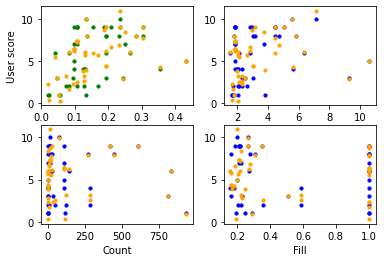

In [6]:
# Visualization

plt.subplot(2,2,1)
plt.scatter(X_train['Threshold: separation'], y_train, c='green', s=10)
plt.scatter(X_train['Threshold: separation'], model.predict(X2_train), c='orange', s=10)
plt.xlabel('Separation')
plt.ylabel('User score')

plt.subplot(2,2,2)
plt.scatter(X_train['Threshold: border'], y_train, c='blue', s=10)
plt.scatter(X_train['Threshold: border'], model.predict(X2_train), c='orange', s=10)
plt.xlabel('Border')

plt.subplot(2,2,3)
plt.scatter(X_train['Threshold: count'], y_train, c='blue', s=10)
plt.scatter(X_train['Threshold: count'], model.predict(X2_train), c='orange', s=10)
plt.xlabel('Count')

plt.subplot(2,2,4)
plt.scatter(X_train['Threshold: fill'], y_train, c='blue', s=10)
plt.scatter(X_train['Threshold: fill'], model.predict(X2_train), c='orange', s=10)
plt.xlabel('Fill')

plt.show()

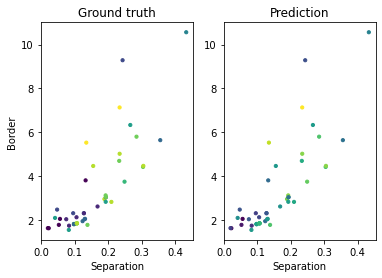

In [7]:
# Visualization

plt.subplot(1,2,1)
plt.scatter(X_train['Threshold: separation'], X_train['Threshold: border'], c=y_train['User score'], s=10)
plt.xlabel('Separation')
plt.ylabel('Border')
plt.title('Ground truth')

plt.subplot(1,2,2)
plt.scatter(X_train['Threshold: separation'], X_train['Threshold: border'], c=model.predict(X2_train), s=10)
plt.xlabel('Separation')
plt.title('Prediction')

plt.show()

# Output
Linear/Polynomial Regression does not give very promising results no matter the number of features, polynomials or selection of features, therefore we decided to drop it.